In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Нейросети

Существует множество видов нейронных сетей, каждая из которых предназначена для решения определенных типов задач. Вот некоторые из наиболее распространенных типов нейронных сетей и их особенности:

1. **Перцептрон:**
   Перцептрон является базовым видом нейронной сети и представляет собой однослойную сеть. Он состоит из входных нейронов, выходных нейронов и весов, соединяющих их. Перцептроны могут использоваться для бинарной классификации и линейной регрессии. Однако они ограничены в своей способности выявления сложных зависимостей.

2. **Сверточная нейронная сеть (CNN):**
   CNN предназначена для обработки изображений и других сеток данных. Она состоит из сверточных слоев, выполняющих операцию свертки для выявления пространственных шаблонов, и пулинговых слоев, уменьшающих размерность данных. CNN хорошо работают с задачами компьютерного зрения, такими как классификация изображений и сегментация объектов.

3. **Рекуррентная нейронная сеть (RNN):**
   RNN предназначена для работы с последовательными данными, такими как временные ряды, тексты и аудиозаписи. Она имеет циклические связи, позволяющие передавать информацию от предыдущих шагов к текущему. Однако обычные RNN могут столкнуться с проблемой затухающего градиента при обучении на длинных последовательностях.

4. **Долгая краткосрочная память (LSTM):**
   LSTM - это тип RNN, который разработан для преодоления проблемы затухающего градиента. Он содержит ячейки памяти и механизмы управления, позволяющие модели сохранять и забывать информацию на долгие периоды времени. LSTM часто используются для задач обработки текстов и временных рядов.

5. **Сеть долгой краткосрочной памяти (GRU):**
   GRU - это альтернатива LSTM, которая также решает проблему затухающего градиента. Она имеет меньше параметров, что может ускорить обучение и уменьшить потребление ресурсов.

6. **Сеть глубокого обучения:**
   Это общее название для нейронных сетей с более чем одним скрытым слоем. Глубокие сети способны выявлять более сложные иерархические признаки из данных. Виды сетей, такие как глубокие CNN и глубокие полносвязные сети, используются для сложных задач классификации и регрессии.

7. **Автокодировщик:**
   Автокодировщик - это тип нейронной сети, используемый для изучения компактных представлений данных. Он состоит из энкодера, который сжимает данные в кодированное представление, и декодера, который восстанавливает исходные данные. Автокодировщики используются для снижения размерности, генерации данных и шумоподавления.

Это лишь некоторые из множества типов нейронных сетей, доступных для различных задач машинного обучения. Выбор подходящего типа зависит от характеристик ваших данных и конкретной задачи.

# Загрузка данных

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Нормализация значений пикселей к диапазону [0, 1]


In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Преобразование меток в формат one-hot encoding


Преобразование меток в формат one-hot encoding - это важный этап при подготовке данных для обучения модели классификации. Давайте рассмотрим этот момент подробнее:

Зачем это:

В задачах многоклассовой классификации, таких как классификация изображений на наборе данных Fashion MNIST, метки классов представляют собой целые числа (например, от 0 до 9), которые обозначают класс, к которому принадлежит каждый объект. Однако, нейронные сети требуют, чтобы метки были представлены в виде векторов, где каждый элемент вектора соответствует одному классу и равен 1, если объект принадлежит этому классу, и 0 в противном случае. Это позволяет сети правильно интерпретировать метки как выходные данные.

Что это значит:

Представим, что у нас есть метка класса 3. Вместо того чтобы использовать ее напрямую, мы создаем вектор [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], где 1 находится в позиции, соответствующей классу 3. Это означает, что объект принадлежит классу 3.

Какие параметры:

train_labels и test_labels: Это массивы, содержащие целые числа, представляющие метки классов.

num_classes: Это количество классов в задаче. В случае набора данных Fashion MNIST, у нас есть 10 классов (например, футболка, платье, обувь и так далее).

Альтернативные значения:

Параметры здесь определены явно и не имеют альтернативных значений.

Что может поменяться:

Если у вас есть задача с другим числом классов, значение num_classes будет отличаться от 10.
В некоторых случаях, например, при использовании библиотеки scikit-learn, вы можете встретить подобную функцию, которая преобразует метки в формат one-hot encoding. В этом случае синтаксис может отличаться.
Пример:

Пусть у нас есть следующие метки классов:

train_labels = [3, 2, 0, 1, 4]
test_labels = [1, 4, 3, 0, 2]
После преобразования в формат one-hot encoding, мы получим:

train_labels:

[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],<br>
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],<br>
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],<br>
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],<br>
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]<br>

test_labels:

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],<br>
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],<br>
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],<br>
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],<br>
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]<br>


In [5]:
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Создание архитектуры нейронной сети

Эта архитектура представляет собой сверточную нейронную сеть (CNN) для классификации изображений.

Зачем это:

Сверточные нейронные сети (CNN) эффективно работают с изображениями, так как они способны выявлять пространственные шаблоны и иерархические признаки. Архитектура, предложенная в коде, состоит из нескольких слоев, каждый из которых выполняет определенные операции для обработки и абстракции признаков изображений.

Что это значит:

1. Conv2D: Это сверточный слой, который применяет фильтры к входному изображению, чтобы выявить различные пространственные признаки, такие как границы, текстуры и т.д. Первый аргумент (32 или 64) - количество фильтров, activation='relu' - функция активации ReLU.

2. MaxPooling2D: Это слой пулинга, который уменьшает размерность изображения, сохраняя наиболее важные информационные фрагменты. Он выполняет операцию максимального пулинга, выбирая максимальное значение из определенной области.

3. Flatten: Этот слой преобразует выходные данные из сверточных слоев в плоский вектор, который будет передан в полносвязные слои.

4. Dropout: Слой Dropout добавляется для борьбы с переобучением. Здесь 0.5 означает, что случайно выбранные 50% нейронов будут отключены на каждой эпохе обучения.

5. Dense: Полносвязный слой, в котором каждый нейрон связан с каждым нейроном предыдущего слоя. В последнем слое используется функция активации Softmax, чтобы получить вероятности принадлежности изображения к каждому классу.

Какие параметры:

1. Количество фильтров (32 и 64) в сверточных слоях.
2. Размер фильтра (3, 3) в сверточных слоях.
3. Функция активации activation='relu' в сверточных слоях.
4. input_shape=(28, 28, 1): Это размерность входных данных. 28x28 - размер изображения, 1 - количество каналов (в данном случае, один канал, так как изображения черно-белые).
Альтернативные значения:

Вы можете изменить количество фильтров и размер фильтра в сверточных слоях. Например, Conv2D(16, (5, 5), activation='relu') или Conv2D(128, (3, 3), activation='relu').

Можно использовать другие функции активации, например, activation='sigmoid'.

MaxPooling2D может использовать другие методы пулинга, например, среднее значение вместо максимального.

В полносвязных слоях, вы можете изменить количество нейронов или использовать другие функции активации.

Значение Dropout (0.5) можно изменить в зависимости от того, насколько сильно проявляется переобучение.

Что может поменяться:

1. Изменение параметров может повлиять на способность модели обучаться, скорость обучения и устойчивость к переобучению.

2. Изменение размера фильтра может влиять на то, какие пространственные признаки модель сможет выявлять.

3. Изменение количества фильтров может влиять на сложность и емкость модели.

4. Изменение функций активации может изменить способность модели выявлять нелинейные зависимости.

5. Исходя из вашей задачи и доступных ресурсов, вы можете экспериментировать с разными параметрами, чтобы найти наилучшую архитектуру для вашей модели.

In [ ]:
# model = Sequential([
#     Flatten(input_shape=(28, 28)),   # Преобразование 2D изображения в 1D вектор
#     Dense(128, activation='relu'),    # Полносвязный слой с 128 нейронами и функцией активации ReLU
#     Dense(10, activation='softmax')   # Выходной слой с 10 нейронами и функцией активации Softmax
# ])

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Компиляция модели с оптимизатором Adam


Зачем это:

1. Компиляция модели - это процесс подготовки модели к обучению путем определения нескольких важных аспектов, таких как оптимизатор, функция потерь и метрики. Эти аспекты влияют на то, как модель будет обучаться и как будет оцениваться ее производительность.

2. Какие параметры и что они значат:

3. optimizer: Этот параметр определяет оптимизатор, который будет использоваться для обновления весов модели в процессе обучения. Здесь мы используем оптимизатор Adam, который является расширением стохастического градиентного спуска и обеспечивает хорошие результаты на многих задачах. Adam(learning_rate=0.001) указывает скорость обучения (learning rate) для оптимизатора.

4. loss: Этот параметр определяет функцию потерь, которая будет минимизироваться во время обучения. В данном случае, мы используем категориальную перекрестную энтропию (categorical_crossentropy), так как решаем задачу многоклассовой классификации.

5. metrics: Этот параметр определяет список метрик, которые будут оцениваться в процессе обучения. В данном случае, мы оцениваем точность (accuracy), которая показывает, как часто модель правильно классифицирует объекты.

Альтернативные значения:

1. optimizer: Вместо Adam, можно использовать другие оптимизаторы, такие как SGD (стохастический градиентный спуск), RMSprop и другие. Каждый из них имеет свои параметры, такие как скорость обучения.

2. loss: Для разных задач могут использоваться разные функции потерь. Например, в задаче регрессии можно использовать среднеквадратичную ошибку (mean_squared_error).

3. metrics: Кроме точности, можно оценивать другие метрики, такие как precision, recall, F1-score и другие, в зависимости от конкретной задачи.

Что может поменяться:

1. Изменение оптимизатора и скорости обучения может повлиять на скорость сходимости обучения и качество результатов. Разные оптимизаторы могут хорошо себя показывать на разных задачах.

2. Изменение функции потерь может изменить, как модель воспринимает ошибки и как она будет их корректировать.

3. Изменение метрик может дать более полное представление о производительности модели на задаче, помимо обычной точности.

4. Выбор оптимальных параметров компиляции зависит от конкретной задачи, структуры модели и данных. Экспериментируйте с разными параметрами и анализируйте, как они влияют на обучение и результаты.

In [8]:

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели

In [9]:

history = model.fit(train_images[..., np.newaxis], train_labels, epochs=20, validation_split=0.2, verbose=2)

Epoch 1/20
1500/1500 - 23s - loss: 0.6003 - accuracy: 0.7740 - val_loss: 0.3910 - val_accuracy: 0.8538 - 23s/epoch - 16ms/step
Epoch 2/20
1500/1500 - 28s - loss: 0.3927 - accuracy: 0.8550 - val_loss: 0.3321 - val_accuracy: 0.8764 - 28s/epoch - 18ms/step
Epoch 3/20
1500/1500 - 20s - loss: 0.3389 - accuracy: 0.8749 - val_loss: 0.2952 - val_accuracy: 0.8903 - 20s/epoch - 13ms/step
Epoch 4/20
1500/1500 - 22s - loss: 0.3077 - accuracy: 0.8871 - val_loss: 0.2798 - val_accuracy: 0.8978 - 22s/epoch - 15ms/step
Epoch 5/20
1500/1500 - 30s - loss: 0.2873 - accuracy: 0.8938 - val_loss: 0.2627 - val_accuracy: 0.9010 - 30s/epoch - 20ms/step
Epoch 6/20
1500/1500 - 25s - loss: 0.2688 - accuracy: 0.9011 - val_loss: 0.2590 - val_accuracy: 0.9020 - 25s/epoch - 17ms/step
Epoch 7/20
1500/1500 - 20s - loss: 0.2573 - accuracy: 0.9039 - val_loss: 0.2524 - val_accuracy: 0.9046 - 20s/epoch - 13ms/step
Epoch 8/20
1500/1500 - 19s - loss: 0.2440 - accuracy: 0.9085 - val_loss: 0.2484 - val_accuracy: 0.9084 - 19s/ep

# Визуализация процесса обучения

In [18]:

plt.figure(figsize=(12, 4))


<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

# График точности


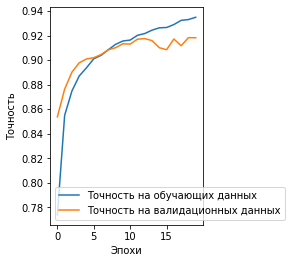

In [19]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точность на обучающих данных')
plt.plot(history.history['val_accuracy'], label='Точность на валидационных данных')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()



# График функции потерь


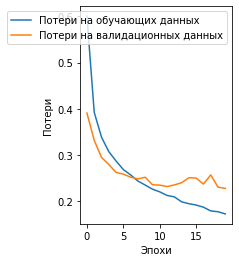

In [20]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Потери на обучающих данных')
plt.plot(history.history['val_loss'], label='Потери на валидационных данных')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()


In [21]:
plt.show()

# Оценка модели на тестовых данных

Этот код относится к фазе оценки модели на тестовых данных после ее обучения. Давайте разберем каждый аспект:

Зачем это:

1. Оценка модели на тестовых данных позволяет оценить ее производительность на независимом наборе данных, которые модель ранее не видела во время обучения. Это помогает определить, насколько хорошо модель обобщает и как она будет себя вести на новых, реальных данных.

Какие параметры и что они значат:

1. test_images[..., np.newaxis]: Здесь мы добавляем новую размерность к тестовым изображениям. Это необходимо, так как модель ожидает входные данные в формате (количество_изображений, высота, ширина, количество_каналов), а у нас изображения в формате (количество_изображений, высота, ширина). Добавление новой оси преобразует данные в нужный формат.

2. test_labels: Метки классов для тестовых данных.

3. verbose=2: Этот параметр контролирует уровень вывода во время оценки модели. Значение 2 означает более подробный вывод.

4. test_loss: Здесь будет сохранено значение функции потерь модели на тестовых данных.

5. test_accuracy: Здесь будет сохранено значение точности модели на тестовых данных.

Альтернативные значения:

1. Вы можете использовать другие метрики для оценки модели, помимо функции потерь и точности. Например, вы можете измерить precision, recall, F1-score и другие, в зависимости от целей задачи.
Что может поменяться:

2. Если вы хотите оценить модель на другом наборе данных, вам нужно будет заменить test_images и test_labels на новые данные.

3. Изменение параметра verbose позволит вам настроить уровень подробности вывода при оценке модели.

Вывод точности на тестовых данных помогает понять, как хорошо модель производит классификацию на новых данных, которые она ранее не видела. Это важный шаг для оценки производительности модели и дальнейшего принятия решений о ее использовании или настройке.

In [22]:

test_loss, test_accuracy = model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)
print(f"Точность на тестовых данных: {test_accuracy:.4f}")

313/313 - 2s - loss: 0.2452 - accuracy: 0.9147 - 2s/epoch - 5ms/step
Точность на тестовых данных: 0.9147


# Что дальше

Дальше мы рассмотрить создание нейросетей для регрессии. Для примера мы будем использовать датасет с домами